In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
os.listdir("/kaggle/input/kdd-cup-1999-data")

['kddcup.data.gz',
 'kddcup.data',
 'kddcup.testdata.unlabeled',
 'training_attack_types',
 'kddcup.data.corrected',
 'kddcup.newtestdata_10_percent_unlabeled.gz',
 'corrected',
 'kddcup.testdata.unlabeled.gz',
 'kddcup.testdata.unlabeled_10_percent',
 'corrected.gz',
 'kddcup.newtestdata_10_percent_unlabeled',
 'kddcup.data_10_percent.gz',
 'kddcup.names',
 'kddcup.data_10_percent_corrected',
 'typo-correction.txt',
 'kddcup.data_10_percent',
 'kddcup.testdata.unlabeled_10_percent.gz']

In [3]:
!cat /kaggle/input/kdd-cup-1999-data/kddcup.names

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [4]:
col_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 
             'dst_bytes','land', 'wrong_fragment', 'urgent', 'hot', 
             'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
             'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 
             'num_access_files', 'num_outbound_cmds', 'is_host_login', 
             'is_guest_login', 'count', 'srv_count', 'serror_rate', 
             'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 
             'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 
             'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
             'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
             'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 
             'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
             'dst_host_srv_rerror_rate', 'label']

In [5]:
df = pd.read_csv('/kaggle/input/kdd-cup-1999-data/kddcup.data.gz', names=col_names)

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
df.shape

(4898431, 42)

In [8]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [9]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
df['label'].value_counts()

label
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64

In [11]:
df['label'].nunique()

23

In [12]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))

cate_cols

['protocol_type', 'service', 'flag', 'label']

In [13]:
df[cate_cols]

,protocol_type,service,flag,label
0,tcp,http,SF,normal.
1,tcp,http,SF,normal.
2,tcp,http,SF,normal.
3,tcp,http,SF,normal.
4,tcp,http,SF,normal.
...,...,...,...,...
4898426,tcp,http,SF,normal.
4898427,tcp,http,SF,normal.
4898428,tcp,http,SF,normal.
4898429,tcp,http,SF,normal.


In [14]:
# Make a copy of the initial dataframe so we can use different approach later
init_df = df.copy(deep=True)

In [15]:
for category in cate_cols:
    print(df[category].value_counts())

protocol_type
icmp    2833545
tcp     1870598
udp      194288
Name: count, dtype: int64
service
ecr_i        2811660
private      1100831
http          623091
smtp           96554
other          72653
              ...   
tftp_u             3
harvest            2
aol                2
http_8001          2
http_2784          1
Name: count, Length: 70, dtype: int64
flag
SF        3744328
S0         869829
REJ        268874
RSTR         8094
RSTO         5344
SH           1040
S1            532
S2            161
RSTOS0        122
OTH            57
S3             50
Name: count, dtype: int64
label
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmas

In [16]:
category_mapping = {}
# Convert the non numerical values into numeric values via categorization e.g. TCP - 1, UDP -2 ...
for category in cate_cols:
    labels, unique_values = pd.factorize(df[category])
    df[category] = labels
    category_mapping[category] = dict(zip(set(unique_values), set(labels)))

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,0,0,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0,0,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0,0,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0,0,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,0
4,0,0,0,0,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0


In [17]:
category_mapping

{'protocol_type': {'tcp': 0, 'udp': 1, 'icmp': 2},
 'service': {'sql_net': 0,
  'kshell': 1,
  'ecr_i': 2,
  'discard': 3,
  'netbios_ns': 4,
  'smtp': 5,
  'systat': 6,
  'daytime': 7,
  'login': 8,
  'telnet': 9,
  'netbios_dgm': 10,
  'rje': 11,
  'http': 12,
  'http_443': 13,
  'whois': 14,
  'courier': 15,
  'supdup': 16,
  'domain': 17,
  'domain_u': 18,
  'hostnames': 19,
  'private': 20,
  'netbios_ssn': 21,
  'name': 22,
  'netstat': 23,
  'echo': 24,
  'urh_i': 25,
  'pop_2': 26,
  'harvest': 27,
  'efs': 28,
  'uucp_path': 29,
  'bgp': 30,
  'ftp_data': 31,
  'mtp': 32,
  'aol': 33,
  'urp_i': 34,
  'other': 35,
  'ftp': 36,
  'printer': 37,
  'red_i': 38,
  'tftp_u': 39,
  'gopher': 40,
  'nntp': 41,
  'sunrpc': 42,
  'time': 43,
  'klogin': 44,
  'imap4': 45,
  'http_2784': 46,
  'shell': 47,
  'X11': 48,
  'http_8001': 49,
  'eco_i': 50,
  'ntp_u': 51,
  'ssh': 52,
  'finger': 53,
  'ctf': 54,
  'IRC': 55,
  'tim_i': 56,
  'remote_job': 57,
  'iso_tsap': 58,
  'uucp': 59,

In [18]:
for category in cate_cols:
    print(df[category].value_counts())

protocol_type
2    2833545
0    1870598
1     194288
Name: count, dtype: int64
service
9     2811660
12    1100831
0      623091
1       96554
10      72653
       ...   
66          3
64          2
65          2
67          2
63          1
Name: count, Length: 70, dtype: int64
flag
0     3744328
7      869829
5      268874
8        8094
6        5344
10       1040
2         532
1         161
9         122
4          57
3          50
Name: count, dtype: int64
label
5     2807886
4     1072017
0      972781
15      15892
10      12481
9       10413
17       2316
13       2203
20       1020
8         979
7         264
6          53
1          30
11         21
19         20
14         12
22         10
2           9
12          8
18          7
16          4
3           3
21          2
Name: count, dtype: int64


<Axes: >

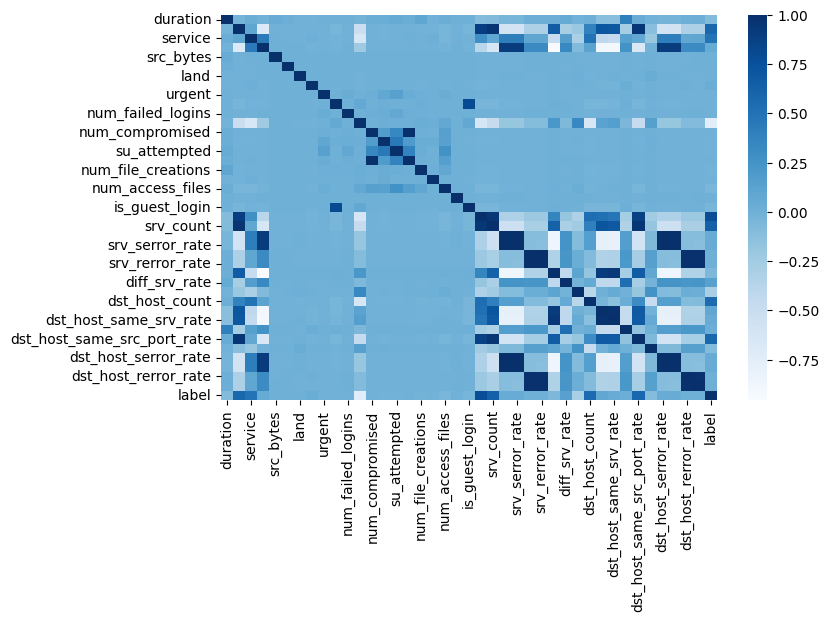

In [19]:
df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, cmap='Blues')

In [20]:
X = torch.tensor(df.drop('label',axis=1).values.astype(np.float32))
y = torch.tensor(df['label'].values, dtype=torch.long)
X,y

(tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0100, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0100, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0100, 0.0000, 0.0000]]),
 tensor([0, 0, 0,  ..., 0, 0, 0]))

In [21]:
y.size()

torch.Size([4898431])

In [22]:
X.shape

torch.Size([4898431, 40])

In [23]:
def pct_to_val(train_pct, data):
    '''Helper function to make code cleaer.
        changes percentage split into numbers of data.
        INPUTS:
        train_pct: the percentage of training data 
        valid_pct: the percentage of validation data
        data: the dataset
        returns: numbers of data'''
    train_num = int(train_pct/100*len(data))
    valid_num = int(len(data) - train_num)
    return train_num , valid_num

In [24]:
# OPT::::: 1 but cannot stratify with this strategy
# dataset = TensorDataset(X, y)
# train_num,valid_num = pct_to_val(75, dataset)
# Get traning and validation datasets.
# train_ds,valid_ds = random_split(dataset, [train_num, valid_num])

# OPT::::::2 ## stratify using train_test_split from sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33)
train_ds,valid_ds = TensorDataset(X_train, y_train), TensorDataset(X_test, y_test)
# Make a dataloader
BATCH = 1024
train_dl = DataLoader(train_ds, batch_size=BATCH, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=BATCH, shuffle=True)

In [25]:
device = torch.device('cuda') if torch.cuda.is_available() else 'cpu'

def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(d, device) for d in data]
    return data.to(device, non_blocking=True)

In [26]:
class DeviceDL():
    
    def __init__(self, dl, dev):
        self.dl = dl
        self.dev = dev
    
    def __iter__(self):
        for batch in self.dl:
            yield to_device(batch, self.dev)
            
    def __len__(self):
        return len(self.dl)

In [27]:
train_dl = DeviceDL(train_dl, device)
valid_dl = DeviceDL(valid_dl, device)

In [28]:
def accuracy(label, preds):
    
    pred_labels = torch.argmax(preds, dim=1)
    # Check how many predictions match the ground truth labels
    correct_predictions = (pred_labels == label).sum() # Cast to int with .item()
    
    # Calculate accuracy
    accuracy = correct_predictions / len(pred_labels)
    return accuracy

In [29]:
class BaseNet(nn.Module):
    def get_loss(self, batch, loss_fn):
        features,labels = batch
        preds = self(features)
        loss = loss_fn(preds, labels)
        return loss
    
    def validate(self, batch, loss_fn):
        feature, labels = batch
        loss = self.get_loss(batch, loss_fn)
        pred = self(feature)
        
        acc = accuracy(labels, pred)
        return {'valid_loss' : loss , 'valid_acc' : acc}
    
    def average_validation(self, out):
        loss = torch.stack([l['valid_loss'] for l in out]).mean()
        acc = torch.stack([l['valid_acc'] for l in out]).mean()
        return {'valid_loss': loss.item() , 'valid_acc': acc.item()}
    
    def log_epoch(self, e, epoch, res):
        
        print('[{} / {}] epoch/s, training loss is {:.4f} validation loss is {:.4f}, validation accuracy is {:.4f} '\
              .format(e+1,epoch,
                      res['train_loss'],
                      res['valid_loss'],                
                      res['valid_acc']
                     )
             )

In [30]:
class ClassifierMLP(BaseNet):
    
    def __init__(self, activation, input_dim, hidden_1, hidden_2, hidden_3, out):
        super().__init__()
        self.hidden_1 = nn.Linear(input_dim, hidden_1)
        self.hidden_2 = nn.Linear(hidden_1, hidden_2)
        self.hidden_3 = nn.Linear(hidden_2, hidden_3)
        self.out = nn.Linear(hidden_3, out)
        self.activation = activation
        
    def forward(self, x):
        x1 = self.hidden_1(x)
        x2 = self.activation(x1)
        x3 = self.hidden_2(x2)
        x4 = self.activation(x3)
        x5 = self.hidden_3(x4)
        x6 = self.activation(x5)
        out = self.out(x6)
#         Note in pytorch we don't apply activation in final layer or use softmax because cross entropy
# loss function would do it automatically under the hood, we will rather only use softmax when interpreting
# the results in a human readable form. (not even while testing)
        return out
        
        

In [31]:
@torch.no_grad()
def valid(model, valid_dl, loss_fn):
    model.eval()
    out = [model.validate(batch, loss_fn) for batch in valid_dl]
    return model.average_validation(out)
    
def fit(model, train_dl, valid_dl, loss_fn, opt, EPOCHS):
    hist = []
    for e in range(EPOCHS):
        model.train()
        train_loss =[]
        for batch in train_dl:
            
            loss = model.get_loss(batch, loss_fn)
            train_loss.append(loss)
            loss.backward()
            opt.step()
            opt.zero_grad()
        
        res = valid(model, valid_dl, loss_fn)
        res['train_loss'] = torch.stack(train_loss).mean().item()
        
        model.log_epoch(e, EPOCHS, res)

        hist.append(res)
    return hist

In [32]:
activation = nn.ReLU()
input_dim = X.shape[1]
output_dim = df['label'].nunique()
hidden_1, hidden_2, hidden_3 = 256, 128, 128


model = ClassifierMLP(activation, input_dim, hidden_1, hidden_2, hidden_3, output_dim)
to_device(model, device)

ClassifierMLP(
  (hidden_1): Linear(in_features=40, out_features=256, bias=True)
  (hidden_2): Linear(in_features=256, out_features=128, bias=True)
  (hidden_3): Linear(in_features=128, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=23, bias=True)
  (activation): ReLU()
)

In [33]:
loss_fn = nn.CrossEntropyLoss()
lr = 0.000001
opt = torch.optim.Adam(model.parameters(), lr=lr)
EPOCHS = 20

In [34]:
history = fit(model, train_dl, valid_dl, loss_fn, opt, EPOCHS)

[1 / 20] epoch/s, training loss is 35.3244 validation loss is 22.7883, validation accuracy is 0.7891 
[2 / 20] epoch/s, training loss is 23.8802 validation loss is 15.6073, validation accuracy is 0.8772 
[3 / 20] epoch/s, training loss is 14.9602 validation loss is 10.1812, validation accuracy is 0.9607 
[4 / 20] epoch/s, training loss is 11.7059 validation loss is 8.4565, validation accuracy is 0.9639 
[5 / 20] epoch/s, training loss is 9.5060 validation loss is 6.7623, validation accuracy is 0.9703 
[6 / 20] epoch/s, training loss is 7.4774 validation loss is 5.1360, validation accuracy is 0.9776 
[7 / 20] epoch/s, training loss is 5.9548 validation loss is 3.9536, validation accuracy is 0.9770 
[8 / 20] epoch/s, training loss is 4.1877 validation loss is 2.4943, validation accuracy is 0.9792 
[9 / 20] epoch/s, training loss is 2.4654 validation loss is 1.0763, validation accuracy is 0.9868 
[10 / 20] epoch/s, training loss is 0.9214 validation loss is 0.4882, validation accuracy is 

In [35]:
epochs = range(1,len(history)+1)
val_acc_values = [entry['valid_acc'] for entry in history]
test_loss_values = [entry['train_loss'] for entry in history]
val_loss_values = [entry['valid_loss'] for entry in history]

In [36]:
!mkdir graphs

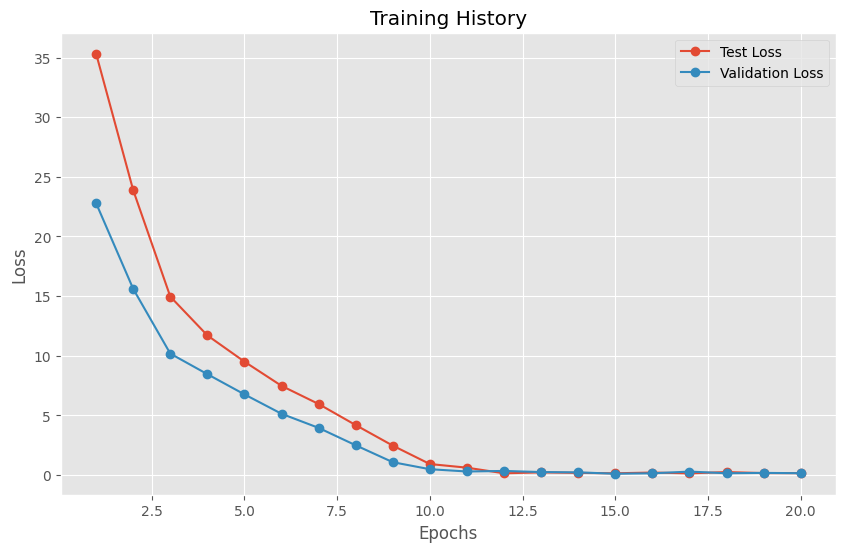

In [37]:
plt.style.use('ggplot')
# Create a new figure
plt.figure(figsize=(10, 6))

# Plot validation accuracy
# plt.plot(epochs, val_acc_values, label='Validation Accuracy', marker='o', linestyle='-')
# Plot test loss
plt.plot(epochs, test_loss_values, label='Test Loss', marker='o', linestyle='-')
# Plot validation loss
plt.plot(epochs, val_loss_values, label='Validation Loss', marker='o', linestyle='-')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('graphs/Training_history_standard.png', dpi=300)

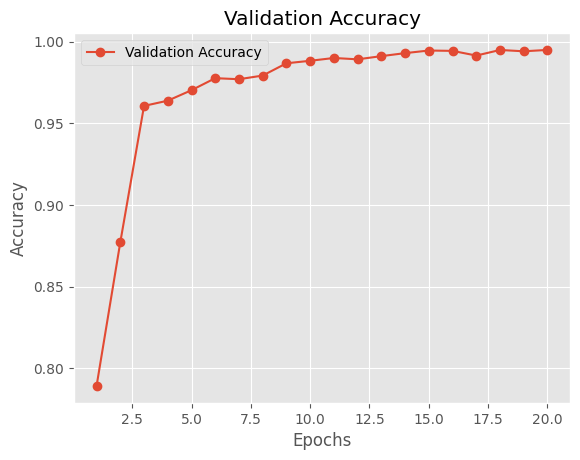

In [38]:
plt.plot(epochs, val_acc_values, label='Validation Accuracy', marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('graphs/validation_acc_standard.png', dpi=300)

In [39]:
y_pred = model(X_test.to(device))
y_preds = torch.argmax(y_pred, axis = 1).to('cpu').detach().numpy()

In [40]:
!mkdir classification_reports

In [44]:
category_mapping['label']

{'normal.': 0,
 'satan.': 1,
 'spy.': 2,
 'teardrop.': 3,
 'neptune.': 4,
 'ftp_write.': 5,
 'warezmaster.': 6,
 'warezclient.': 7,
 'buffer_overflow.': 8,
 'back.': 9,
 'smurf.': 10,
 'guess_passwd.': 11,
 'perl.': 12,
 'portsweep.': 13,
 'loadmodule.': 14,
 'rootkit.': 15,
 'ipsweep.': 16,
 'phf.': 17,
 'nmap.': 18,
 'pod.': 19,
 'land.': 20,
 'multihop.': 21,
 'imap.': 22}

In [46]:
report = classification_report(y_test, y_preds, zero_division=1, target_names=category_mapping['label'].keys(), output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.round(4)
# Save the DataFrame as a CSV file
report_df.to_csv('classification_reports/classification_standard.csv', index=True)

print(report)

{'normal.': {'precision': 0.9884084534078033, 'recall': 0.9944925206686229, 'f1-score': 0.991441153270436, 'support': 321018}, 'satan.': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 10}, 'spy.': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3}, 'teardrop.': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'neptune.': {'precision': 0.9954765924226582, 'recall': 0.9984453000005653, 'f1-score': 0.9969587361890635, 'support': 353766}, 'ftp_write.': {'precision': 0.9998262136708315, 'recall': 0.9996341475259631, 'f1-score': 0.9997301713735572, 'support': 926603}, 'warezmaster.': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 17}, 'warezclient.': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 87}, 'buffer_overflow.': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 323}, 'back.': {'precision': 0.6555364067212408, 'recall': 0.8856228172293364, 'f1-score': 0.753404307997029, 'support': 3436}, 'smurf.':

In [47]:
del report_df

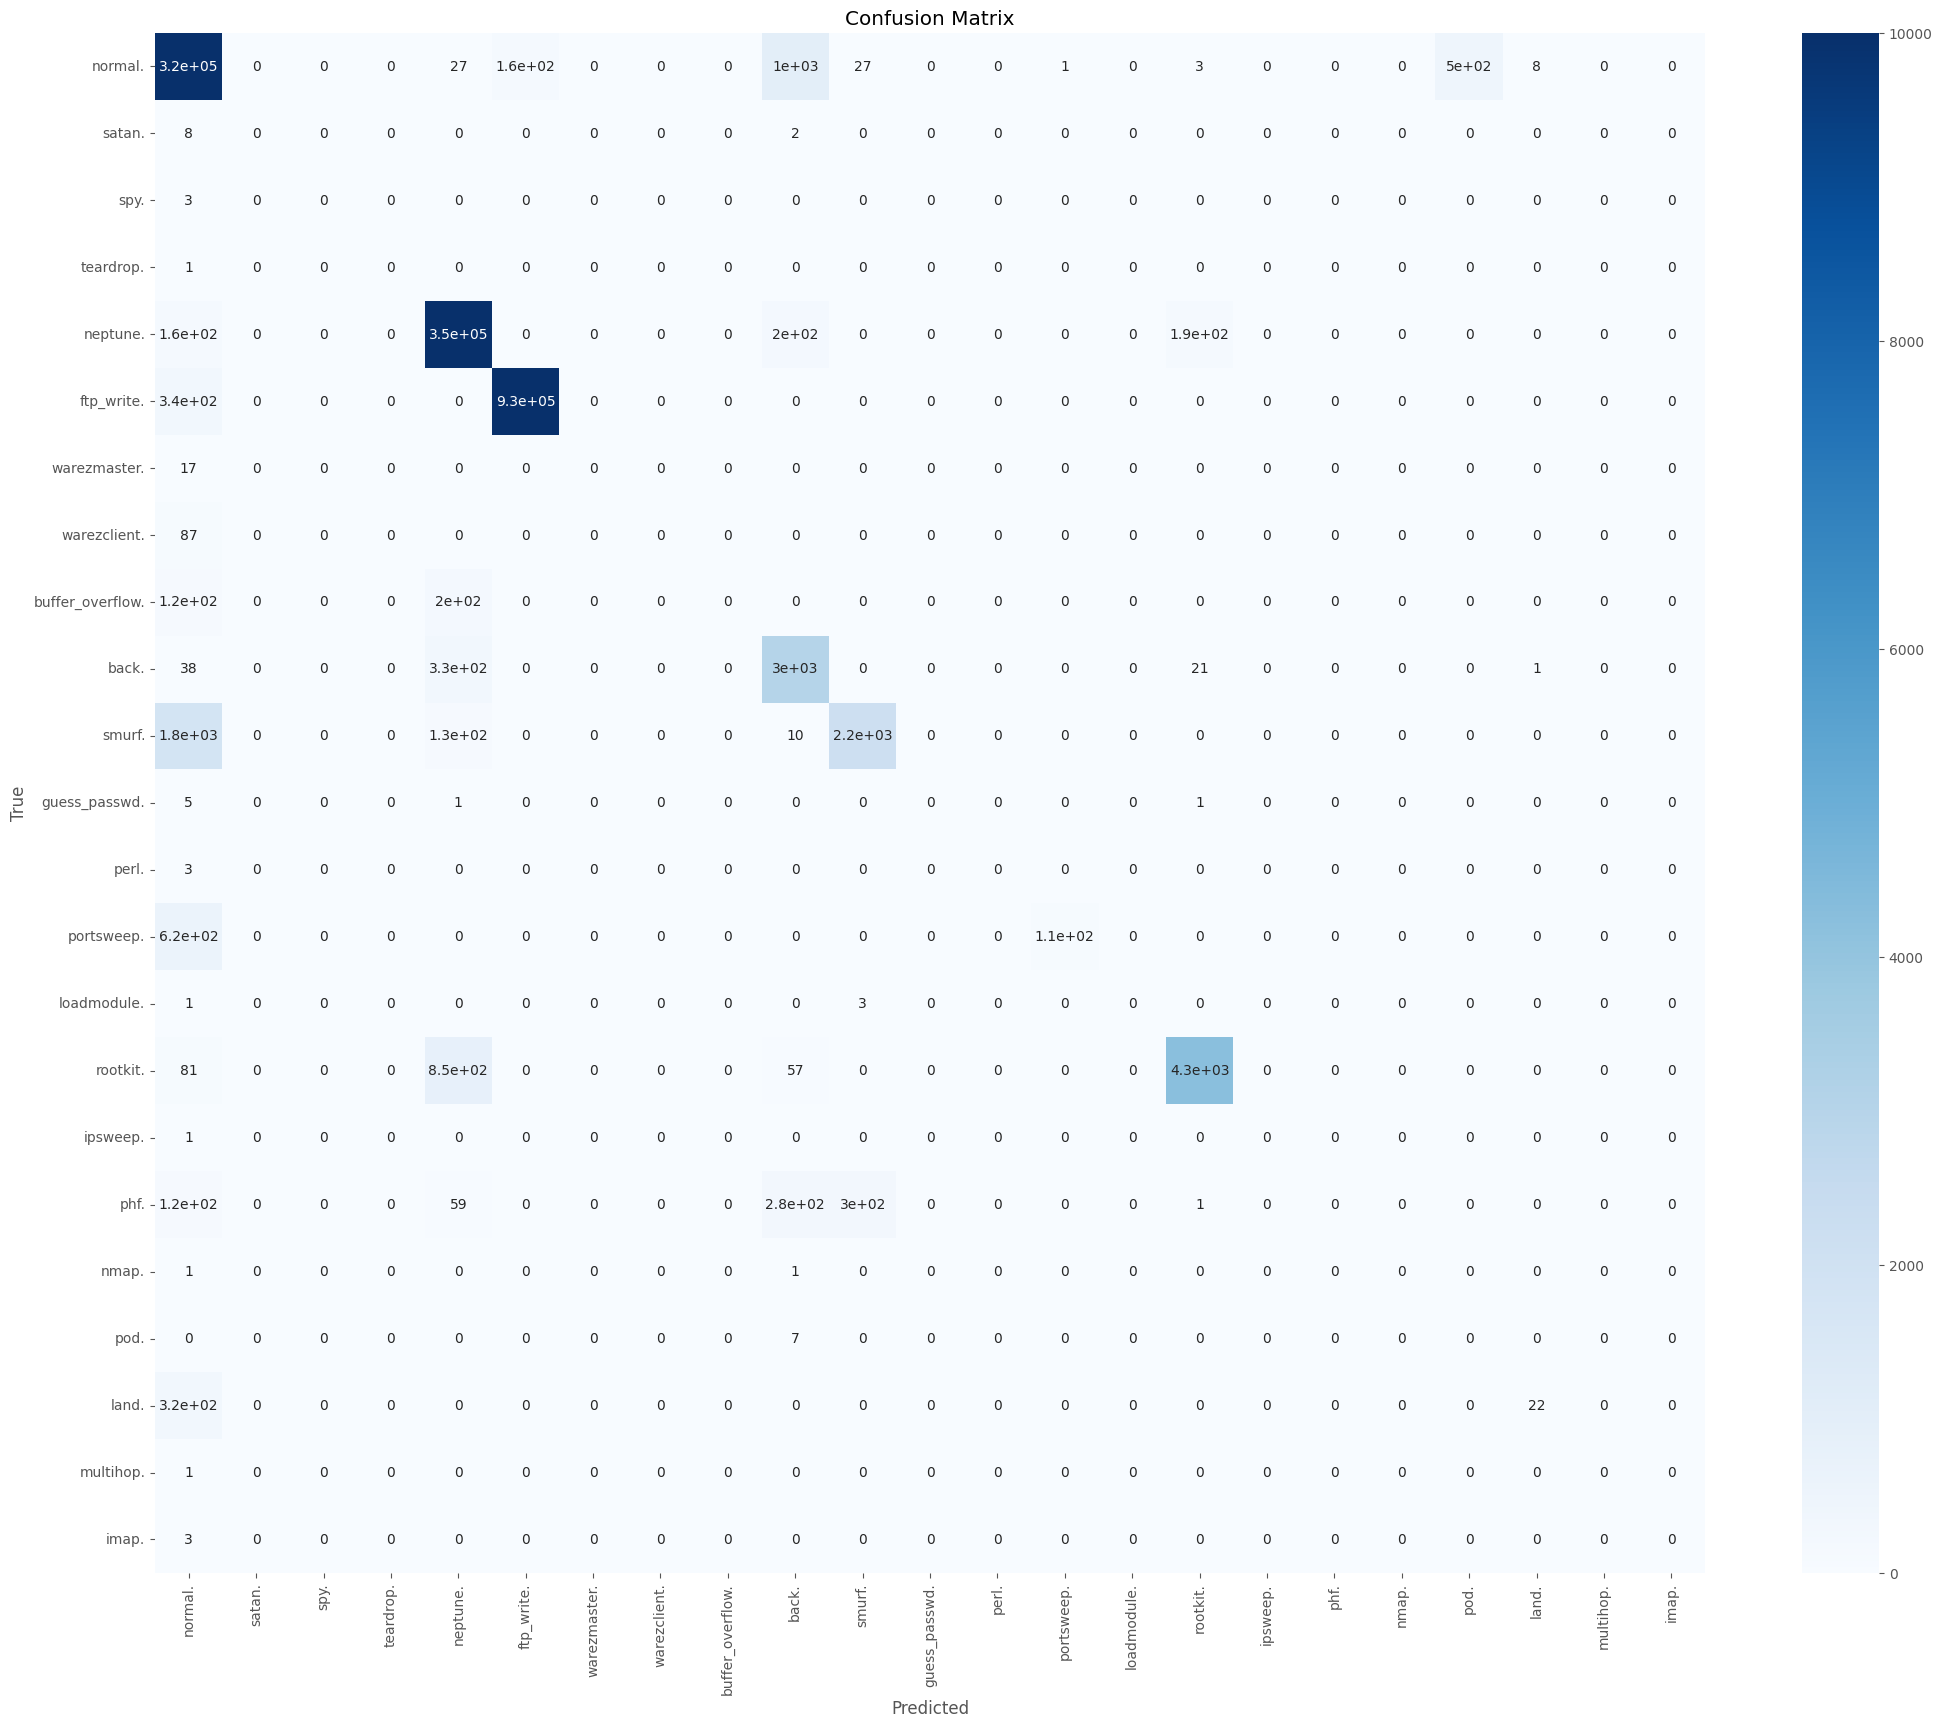

In [48]:
confusion = confusion_matrix(y_test, y_preds)

categories = category_mapping['label'].keys()
plt.figure(figsize=(25,20))

sns.heatmap(confusion,
            annot=True,
            cmap='Blues', 
            xticklabels = categories,
            yticklabels = categories,
            vmin=0, vmax=10000
            )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('graphs/confusion_standard.png', dpi=300)

In [49]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y.numpy())

print(dict(zip(category_mapping['label'].keys(),class_weights)))
print(init_df['label'].value_counts())

class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

{'normal.': 0.2189344373189497, 'satan.': 7099.175362318841, 'spy.': 23663.917874396135, 'teardrop.': 70991.7536231884, 'neptune.': 0.19866780178818547, 'ftp_write.': 0.07584896996158862, 'warezmaster.': 4018.4011484823627, 'warezclient.': 806.7244729907774, 'buffer_overflow.': 217.54367810987253, 'back.': 20.452824437680324, 'smurf.': 17.063958085855717, 'guess_passwd.': 10141.679089026915, 'perl.': 26621.907608695652, 'portsweep.': 96.67510706743768, 'loadmodule.': 17747.9384057971, 'rootkit.': 13.401413344422679, 'ipsweep.': 53243.815217391304, 'phf.': 91.95823008185026, 'nmap.': 30425.037267080745, 'pod.': 10648.76304347826, 'land.': 208.79927536231884, 'multihop.': 106487.63043478261, 'imap.': 21297.52608695652}
label
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.      

In [50]:
model_weighted = ClassifierMLP(activation, input_dim, hidden_1, hidden_2, hidden_3, output_dim)
to_device(model_weighted, device)

ClassifierMLP(
  (hidden_1): Linear(in_features=40, out_features=256, bias=True)
  (hidden_2): Linear(in_features=256, out_features=128, bias=True)
  (hidden_3): Linear(in_features=128, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=23, bias=True)
  (activation): ReLU()
)

In [51]:
loss_fn = nn.CrossEntropyLoss(class_weights)
lr = 0.000001
opt = torch.optim.Adam(model_weighted.parameters(), lr=lr)

In [52]:
history_weighted = fit(model_weighted, train_dl, valid_dl, loss_fn, opt, EPOCHS)

[1 / 20] epoch/s, training loss is 707.3810 validation loss is 430.2502, validation accuracy is 0.5994 
[2 / 20] epoch/s, training loss is 626.5984 validation loss is 257.5598, validation accuracy is 0.8042 
[3 / 20] epoch/s, training loss is 470.2881 validation loss is 118.5604, validation accuracy is 0.8101 
[4 / 20] epoch/s, training loss is 391.9751 validation loss is 34.6668, validation accuracy is 0.8253 
[5 / 20] epoch/s, training loss is 134.3465 validation loss is 9.1070, validation accuracy is 0.8447 
[6 / 20] epoch/s, training loss is 163.7401 validation loss is 9.3332, validation accuracy is 0.8718 
[7 / 20] epoch/s, training loss is 123.7479 validation loss is 7.2917, validation accuracy is 0.8978 
[8 / 20] epoch/s, training loss is 76.4129 validation loss is 7.5368, validation accuracy is 0.9237 
[9 / 20] epoch/s, training loss is 50.9509 validation loss is 10.2601, validation accuracy is 0.9526 
[10 / 20] epoch/s, training loss is 32.2265 validation loss is 15.2192, vali

In [53]:
val_acc_weighted_values = [entry['valid_acc'] for entry in history_weighted]
test_loss_weighted_values = [entry['train_loss'] for entry in history_weighted]
val_loss_weighted_values = [entry['valid_loss'] for entry in history_weighted]

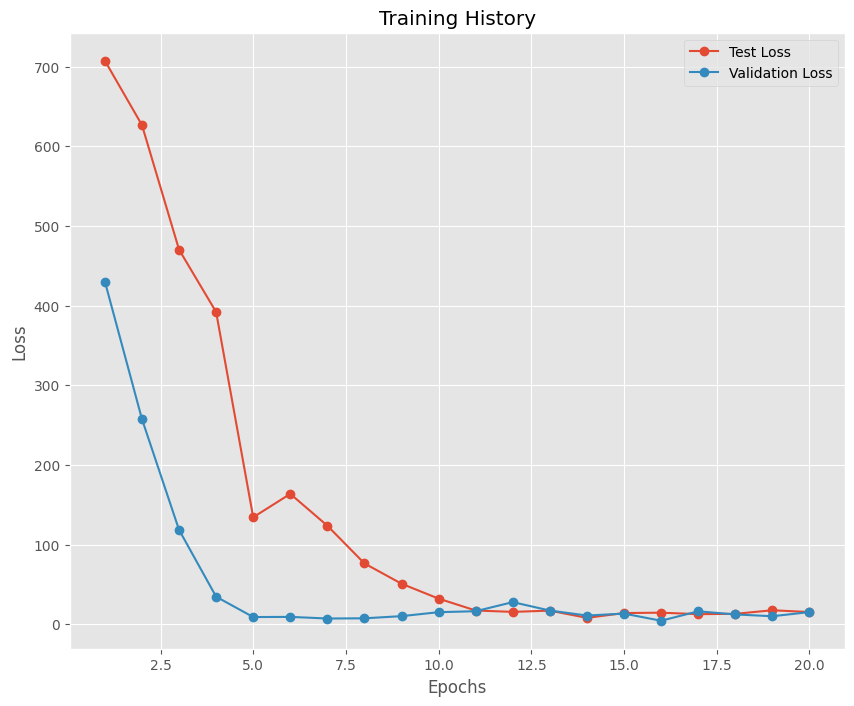

In [54]:
plt.style.use('ggplot')
# Create a new figure
plt.figure(figsize=(10, 8))

# Plot validation accuracy
# plt.plot(epochs, val_acc_values, label='Validation Accuracy', marker='o', linestyle='-')
# Plot test loss
plt.plot(epochs, test_loss_weighted_values, label='Test Loss', marker='o', linestyle='-')
# Plot validation loss
plt.plot(epochs, val_loss_weighted_values, label='Validation Loss', marker='o', linestyle='-')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('graphs/training_history_weighted.png', dpi=300)

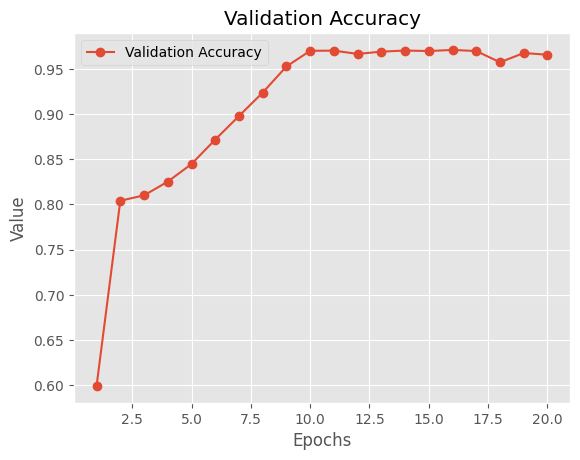

In [55]:
plt.plot(epochs, val_acc_weighted_values, label='Validation Accuracy', marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Validation Accuracy')
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('graphs/validation_acc_weighted.png', dpi=300)

In [56]:
y_pred = model_weighted(X_test.to(device))
y_preds = torch.argmax(y_pred, axis = 1).to('cpu').detach().numpy()

In [58]:
report = classification_report(y_test, y_preds, zero_division=1, target_names=category_mapping['label'].keys(), output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.round(4)
# Save the DataFrame as a CSV file
report_df.to_csv('classification_reports/classification_weighted.csv', index=True)

print(report)

{'normal.': {'precision': 0.9942059246662577, 'recall': 0.8632475437514407, 'f1-score': 0.9241101723882078, 'support': 321018}, 'satan.': {'precision': 0.006888633754305396, 'recall': 0.6, 'f1-score': 0.01362088535754824, 'support': 10}, 'spy.': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3}, 'teardrop.': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'neptune.': {'precision': 0.99850743683311, 'recall': 0.9776716812808467, 'f1-score': 0.9879797186317217, 'support': 353766}, 'ftp_write.': {'precision': 0.999903830153245, 'recall': 0.9986553032960178, 'f1-score': 0.9992791767388444, 'support': 926603}, 'warezmaster.': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 17}, 'warezclient.': {'precision': 0.2934131736526946, 'recall': 0.5632183908045977, 'f1-score': 0.3858267716535433, 'support': 87}, 'buffer_overflow.': {'precision': 0.02947475777664457, 'recall': 0.8947368421052632, 'f1-score': 0.0570695102685624, 'support': 323}, 'back.': 

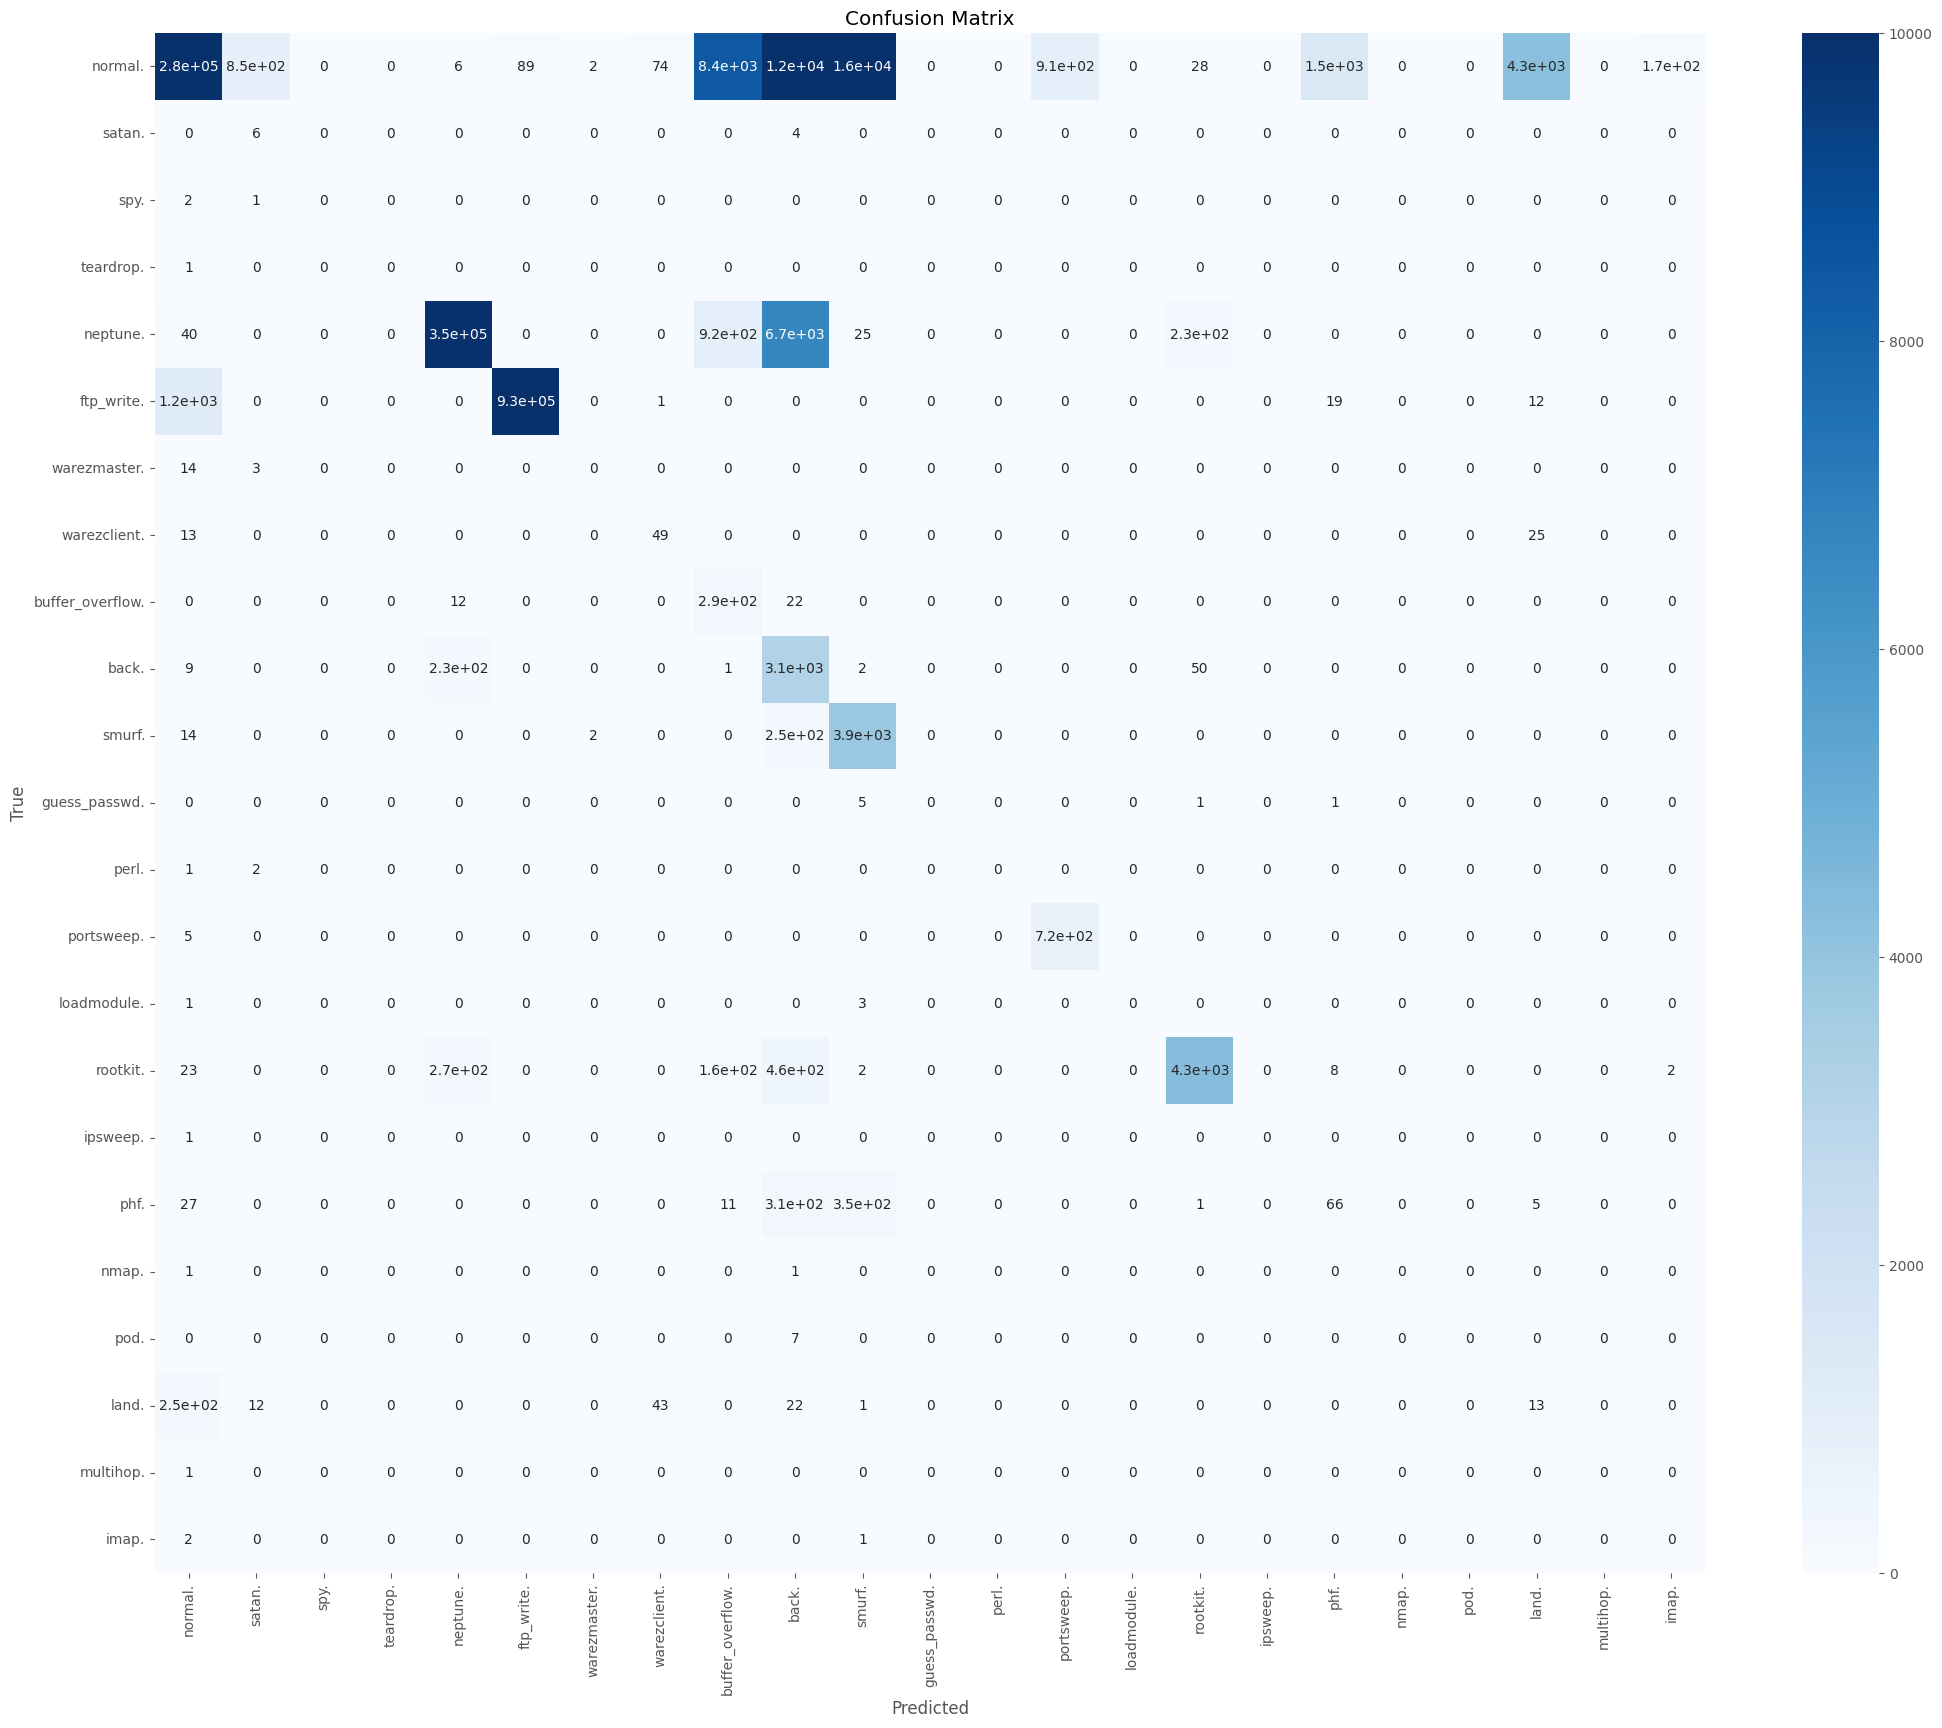

In [59]:
confusion = confusion_matrix(y_test, y_preds)

categories = category_mapping['label'].keys()
plt.figure(figsize=(25,20))

sns.heatmap(confusion,
            annot=True,
            cmap='Blues', 
            xticklabels = categories,
            yticklabels = categories,
            vmin=0, vmax=10000
            )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('graphs/confusion_weighted.png', dpi=300)

In [60]:
!mkdir models

In [61]:
torch.save(model.state_dict(), 'models/model.pth')
torch.save(model_weighted.state_dict(), 'models/model_weighted.pth')

In [62]:
# free-up some ram
del df
del model
del model_weighted
del train_dl
del valid_dl
del X_train, X_test, y_train, y_test 
del train_ds, valid_ds

In [63]:
init_df['label'].value_counts()

label
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64

In [64]:
label_mapping = {
    'back.': 1, 'land.': 1, 'neptune.': 1, 'pod.': 1, 'smurf.': 1, 'teardrop.': 1, 'apache2.': 1,
    'udpstorm.': 1, 'processtable.': 1, 'worm.': 1,
    
    'satan.': 2, 'ipsweep.': 2, 'nmap.': 2, 'portsweep.': 2, 'mscan.': 2, 'saint.': 2,
    
    'guess_passwd.': 3, 'ftp_write.': 3, 'imap.': 3, 'phf.': 3, 'multihop.': 3, 'warezmaster.': 3,
    'warezclient.': 3, 'spy.': 3, 'xlock.': 3, 'xsnoop.': 3, 'snmpguess.': 3, 'snmpgetattack.': 3,
    'httptunnel.': 3, 'sendmail.': 3, 'named.': 3, 'mailbomb.': 3,
    
    'buffer_overflow.': 4, 'loadmodule.': 4, 'rootkit.': 4, 'perl.': 4, 'sqlattack.': 4,
    'xterm.': 4, 'ps.': 4,
    
    'normal.': 0
}

init_df['label'] = init_df['label'].replace(label_mapping)


In [65]:
init_df['label'].value_counts()

label
1    3883370
0     972781
2      41102
3       1126
4         52
Name: count, dtype: int64

In [66]:
category_mapping_truncated = {}

In [67]:
cate_cols.remove('label')

In [68]:
for category in cate_cols:
    labels, unique_values = pd.factorize(init_df[category])
    init_df[category] = labels
    category_mapping_truncated[category] = dict(zip(set(unique_values), set(labels)))

In [69]:
X = torch.tensor(init_df.drop('label',axis=1).values.astype(np.float32))
y = torch.tensor(init_df['label'].values, dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33)
train_ds,valid_ds = TensorDataset(X_train, y_train), TensorDataset(X_test, y_test)
# Make a dataloader
BATCH = 1024
train_dl = DataLoader(train_ds, batch_size=BATCH, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=BATCH, shuffle=True)

train_dl = DeviceDL(train_dl, device)
valid_dl = DeviceDL(valid_dl, device)

In [70]:
class TruncatedClassifierMLP(BaseNet):
    
    def __init__(self, activation, input_dim, hidden_1, hidden_2, out):
        super().__init__()
        self.hidden_1 = nn.Linear(input_dim, hidden_1)
        self.hidden_2 = nn.Linear(hidden_1, hidden_2)
        self.out = nn.Linear(hidden_2, out)
        self.activation = activation
        
    def forward(self, x):
        x1 = self.hidden_1(x)
        x2 = self.activation(x1)
        x3 = self.hidden_2(x2)
        x4 = self.activation(x3)
        out = self.out(x4)
        
        return out

In [71]:
activation = nn.ReLU()
input_dim = X.shape[1]
output_dim = init_df['label'].nunique()
hidden_1, hidden_2 = 128, 64


truncated_model = TruncatedClassifierMLP(activation, input_dim, hidden_1, hidden_2, output_dim)
to_device(truncated_model, device)

TruncatedClassifierMLP(
  (hidden_1): Linear(in_features=41, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=5, bias=True)
  (activation): ReLU()
)

In [72]:
loss_fn = nn.CrossEntropyLoss()
lr = 0.000001
opt = torch.optim.Adam(truncated_model.parameters(), lr=lr)

In [73]:
history_truncated = fit(truncated_model, train_dl, valid_dl, loss_fn, opt, EPOCHS)

[1 / 20] epoch/s, training loss is 32.0419 validation loss is 15.8283, validation accuracy is 0.8481 
[2 / 20] epoch/s, training loss is 25.2512 validation loss is 12.1814, validation accuracy is 0.8679 
[3 / 20] epoch/s, training loss is 20.6248 validation loss is 8.9171, validation accuracy is 0.8845 
[4 / 20] epoch/s, training loss is 16.8057 validation loss is 6.4518, validation accuracy is 0.8949 
[5 / 20] epoch/s, training loss is 12.9124 validation loss is 3.8345, validation accuracy is 0.9258 
[6 / 20] epoch/s, training loss is 9.1769 validation loss is 1.5236, validation accuracy is 0.9849 
[7 / 20] epoch/s, training loss is 6.7956 validation loss is 1.3840, validation accuracy is 0.9911 
[8 / 20] epoch/s, training loss is 6.0622 validation loss is 1.1693, validation accuracy is 0.9945 
[9 / 20] epoch/s, training loss is 5.4762 validation loss is 1.1076, validation accuracy is 0.9948 
[10 / 20] epoch/s, training loss is 4.7340 validation loss is 1.1001, validation accuracy is 

In [74]:
val_acc_values = [entry['valid_acc'] for entry in history_truncated]
test_loss_values = [entry['train_loss'] for entry in history_truncated]
val_loss_values = [entry['valid_loss'] for entry in history_truncated]

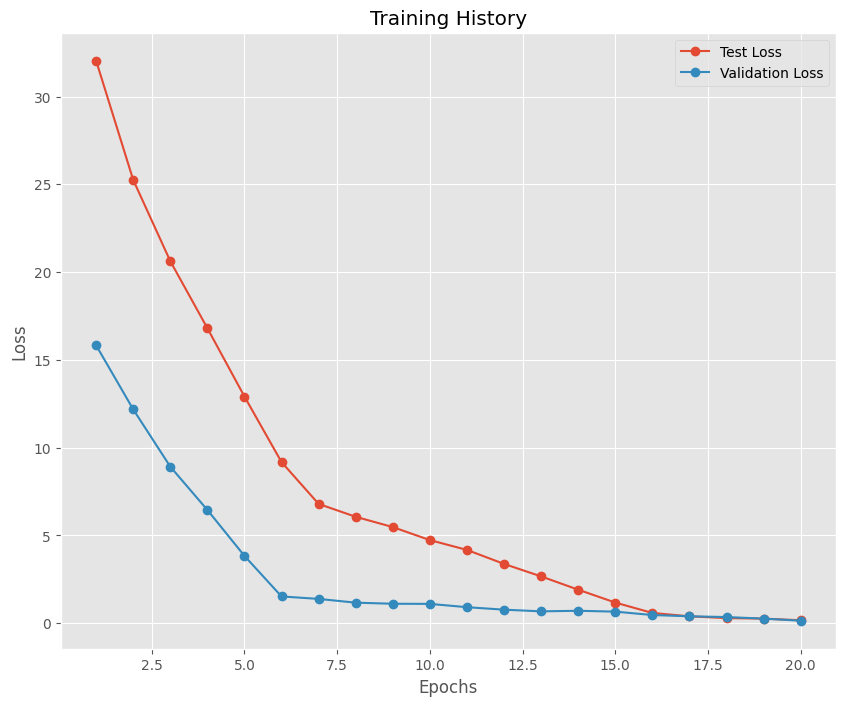

In [75]:
plt.style.use('ggplot')
# Create a new figure
plt.figure(figsize=(10, 8))

# Plot validation accuracy
# plt.plot(epochs, val_acc_values, label='Validation Accuracy', marker='o', linestyle='-')
# Plot test loss
plt.plot(epochs, test_loss_values, label='Test Loss', marker='o', linestyle='-')
# Plot validation loss
plt.plot(epochs, val_loss_values, label='Validation Loss', marker='o', linestyle='-')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('graphs/training_history_truncated.png', dpi=300)

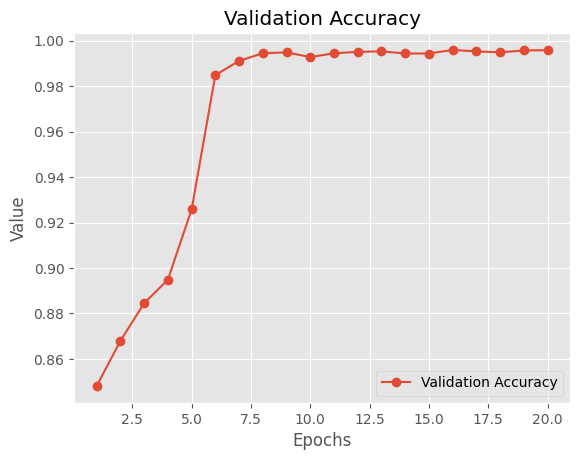

In [76]:
plt.plot(epochs, val_acc_values, label='Validation Accuracy', marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Validation Accuracy')
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('graphs/validation_acc_truncated.png', dpi=300)

In [105]:
truncated_model = TruncatedClassifierMLP(activation, input_dim, hidden_1, hidden_2, output_dim)
to_device(truncated_model, device)
truncated_model.load_state_dict(torch.load('/kaggle/working/models/model_truncated.pth'))
truncated_model.eval()

TruncatedClassifierMLP(
  (hidden_1): Linear(in_features=41, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=5, bias=True)
  (activation): ReLU()
)

In [106]:
y_pred = truncated_model(X_test.to(device))
y_preds = torch.argmax(y_pred, axis = 1).to('cpu').detach().numpy()


In [107]:
category_mapping_truncated = ['Normal', 'probe','DOS', 'R2L','U2R']

In [108]:
report = classification_report(y_test, y_preds, zero_division=1, target_names=category_mapping_truncated, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.round(4)
# Save the DataFrame as a CSV file
report_df.to_csv('classification_reports/classification_truncated.csv', index=True)

print(report)

{'Normal': {'precision': 0.9890747009983196, 'recall': 0.9974736619130391, 'f1-score': 0.9932564264023003, 'support': 321018}, 'probe': {'precision': 0.9988993111717575, 'recall': 0.9985119152127212, 'f1-score': 0.9987055756247051, 'support': 1281513}, 'DOS': {'precision': 0.9216525542011724, 'recall': 0.7302418165732822, 'f1-score': 0.8148574719262885, 'support': 13564}, 'R2L': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 371}, 'U2R': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 17}, 'accuracy': 0.9958149884656999, 'macro avg': {'precision': 0.78192531327425, 'recall': 0.5452454787398084, 'f1-score': 0.5613638947906587, 'support': 1616483}, 'weighted avg': {'precision': 0.9960708096329599, 'recall': 0.9958149884656999, 'f1-score': 0.9958410305432007, 'support': 1616483}}


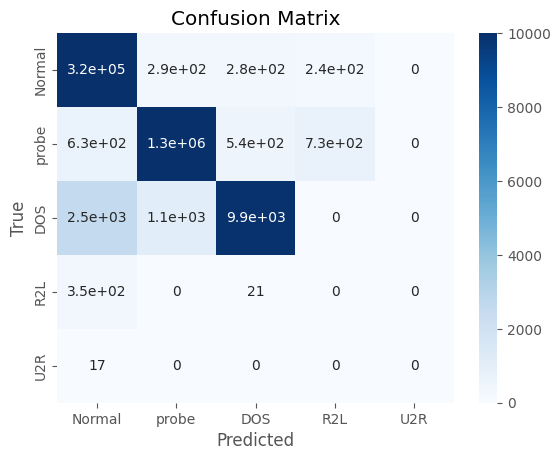

In [109]:
confusion = confusion_matrix(y_test, y_preds)

categories = category_mapping_truncated
# plt.figure(figsize=(25,20))

sns.heatmap(confusion,
            annot=True,
            cmap='Blues', 
            xticklabels = categories,
            yticklabels = categories,
            vmin=0, vmax=10000
            )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('graphs/confusion_truncated.png', dpi=300)

In [85]:
torch.save(truncated_model.state_dict(), 'models/model_truncated.pth')
del truncated_model

In [88]:
truncated_weighted_model = TruncatedClassifierMLP(activation, input_dim, hidden_1, hidden_2, output_dim)
to_device(truncated_weighted_model, device)

TruncatedClassifierMLP(
  (hidden_1): Linear(in_features=41, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=5, bias=True)
  (activation): ReLU()
)

In [89]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y.numpy())

print(dict(zip(init_df['label'].unique(),class_weights)))
print(init_df['label'].value_counts())

class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

{0: 1.0070984116671686, 4: 0.25227732613683473, 1: 23.835487324217798, 3: 870.0587921847247, 2: 18840.11923076923}
label
1    3883370
0     972781
2      41102
3       1126
4         52
Name: count, dtype: int64


In [90]:
loss_fn = nn.CrossEntropyLoss(class_weights)
lr = 0.000001
opt = torch.optim.Adam(truncated_weighted_model.parameters(), lr=lr)

In [91]:
history_weighted_truncated = fit(truncated_weighted_model, train_dl, valid_dl, loss_fn, opt, EPOCHS)

[1 / 20] epoch/s, training loss is 1187.0728 validation loss is 873.6183, validation accuracy is 0.1862 
[2 / 20] epoch/s, training loss is 941.5400 validation loss is 398.4721, validation accuracy is 0.7958 
[3 / 20] epoch/s, training loss is 840.8878 validation loss is 960.3843, validation accuracy is 0.9126 
[4 / 20] epoch/s, training loss is 781.9157 validation loss is 441.1340, validation accuracy is 0.9426 
[5 / 20] epoch/s, training loss is 915.9457 validation loss is 768.0370, validation accuracy is 0.9420 
[6 / 20] epoch/s, training loss is 805.7054 validation loss is 764.9651, validation accuracy is 0.9443 
[7 / 20] epoch/s, training loss is 634.8129 validation loss is 725.8596, validation accuracy is 0.9459 
[8 / 20] epoch/s, training loss is 779.7280 validation loss is 664.2479, validation accuracy is 0.9460 
[9 / 20] epoch/s, training loss is 682.3013 validation loss is 285.0985, validation accuracy is 0.9485 
[10 / 20] epoch/s, training loss is 303.9514 validation loss is

In [92]:
val_acc_weighted_values = [entry['valid_acc'] for entry in history_weighted_truncated]
test_loss_weighted_values = [entry['train_loss'] for entry in history_weighted_truncated]
val_loss_weighted_values = [entry['valid_loss'] for entry in history_weighted_truncated]

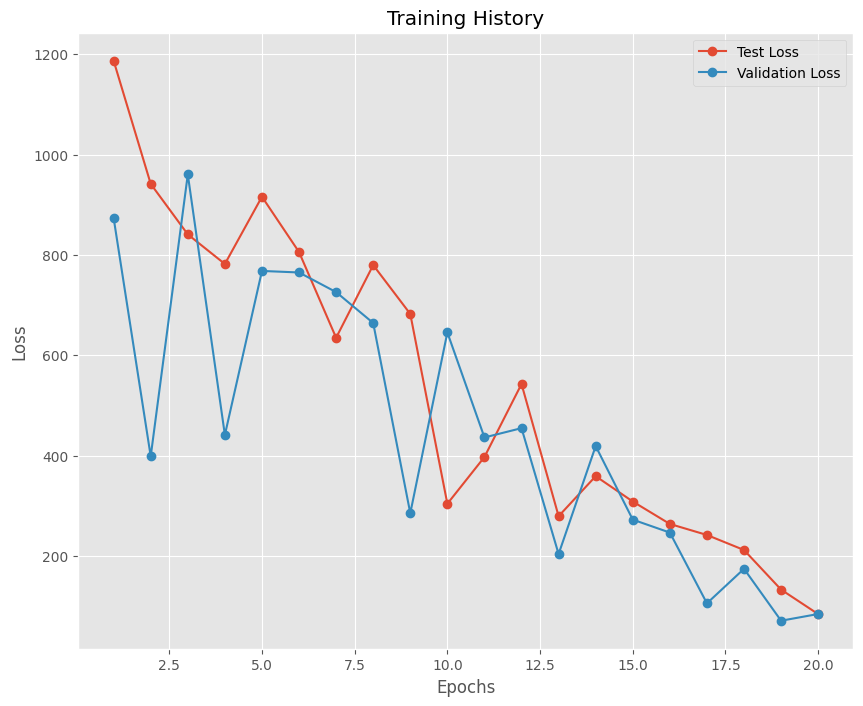

In [93]:
plt.style.use('ggplot')
# Create a new figure
plt.figure(figsize=(10, 8))

# Plot validation accuracy
# plt.plot(epochs, val_acc_values, label='Validation Accuracy', marker='o', linestyle='-')
# Plot test loss
plt.plot(epochs, test_loss_weighted_values, label='Test Loss', marker='o', linestyle='-')
# Plot validation loss
plt.plot(epochs, val_loss_weighted_values, label='Validation Loss', marker='o', linestyle='-')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('graphs/training_history_truncated_weighted.png', dpi=300)

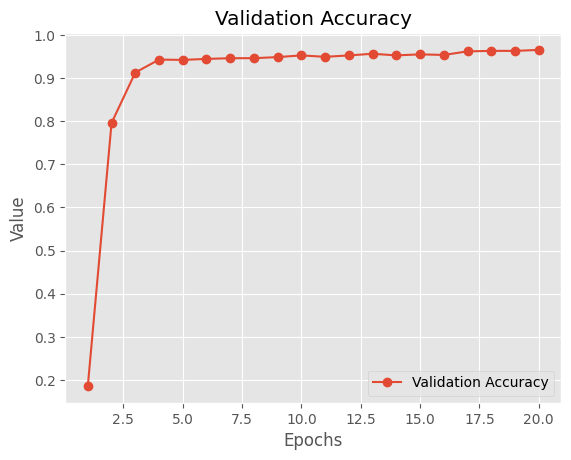

In [94]:
plt.plot(epochs, val_acc_weighted_values, label='Validation Accuracy', marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Validation Accuracy')
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('graphs/validation_acc_truncated_weighted.png', dpi=300)

In [95]:
y_pred = truncated_weighted_model(X_test.to(device))
y_preds = torch.argmax(y_pred, axis = 1).to('cpu').detach().numpy()

In [97]:
report = classification_report(y_test, y_preds, zero_division=1, target_names=category_mapping_truncated, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.round(4)
# Save the DataFrame as a CSV file
report_df.to_csv('classification_reports/classification_truncated_weighted.csv', index=True)

print(report_df)

              precision  recall  f1-score       support
Normal           0.9962  0.8576    0.9217  3.210180e+05
probe            0.9984  0.9923    0.9954  1.281513e+06
DOS              0.2701  0.9545    0.4210  1.356400e+04
R2L              0.0094  0.4717    0.0185  3.710000e+02
U2R              0.0000  0.0000    0.0000  1.700000e+01
accuracy         0.9651  0.9651    0.9651  9.651000e-01
macro avg        0.4548  0.6552    0.4713  1.616483e+06
weighted avg     0.9916  0.9651    0.9757  1.616483e+06


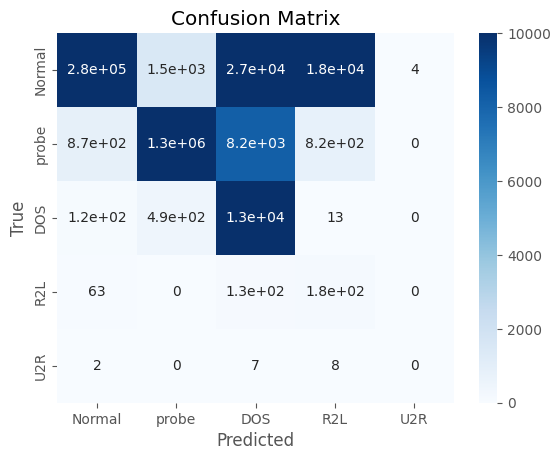

In [102]:
confusion = confusion_matrix(y_test, y_preds)

categories = category_mapping_truncated
# plt.figure(figsize=(25,20))

sns.heatmap(confusion,
            annot=True,
            cmap='Blues', 
            xticklabels = categories,
            yticklabels = categories,
            vmin=0, vmax=10000
            )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('graphs/confusion_truncated_weighted.png', dpi=300)

In [103]:
torch.save(truncated_weighted_model.state_dict(), 'models/model_truncated_weighted.pth')

In [111]:
!tar czf output_folders.tar.gz *